In [1]:
import random
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid

from mlrose_hiive import FourPeaks, DiscreteOpt, random_hill_climb, simulated_annealing, genetic_alg, mimic, OneMax, Knapsack, ContinuousPeaks, FlipFlop

In [2]:
input_sizes = [10, 20, 40, 60, 80, 100]

In [9]:
with open('countones.json', 'r') as f:
    count_ones = json.load(f)
with open('flipflop.json', 'r') as f:
    flipflop = json.load(f)
with open('fourpeaks.json', 'r') as f:
    four_peaks = json.load(f)
with open('knapsack.json', 'r') as f:
    knapsack = json.load(f)

In [46]:
with open('sa.json', 'r') as f:
    sa_tuning = json.load(f)
with open('ga.json', 'r') as f:
    ga_tuning = json.load(f)
with open('mimic.json', 'r') as f:
    mimic_tuning = json.load(f)

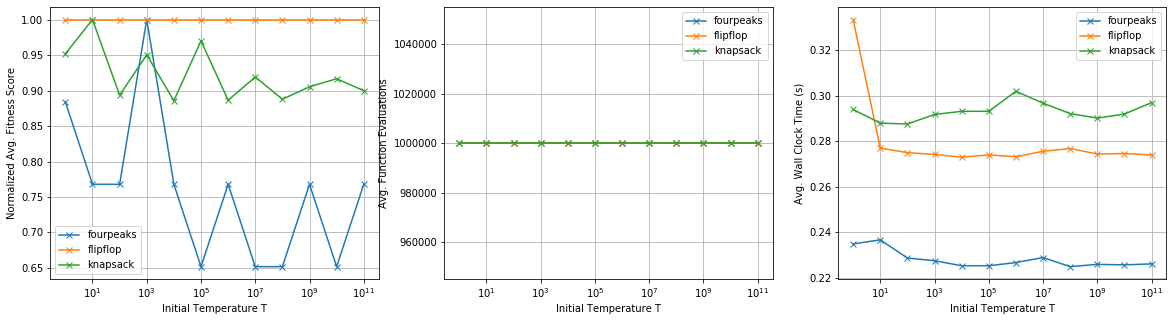

In [42]:
# SA Inital Temps
temps = [1, 10, 1E2, 1E3, 1E4, 1E5, 1E6, 1E7, 1E8, 1E9, 1E10, 1E11]
# Plot the data
_, axes = plt.subplots(1, 3, figsize=(20, 5))
count = 0
for metric in sa_tuning:
    for problem in sa_tuning[metric]:
        y = sa_tuning[metric][problem]
        if metric == 'scores':
            y_norm = [float(i) / max(y) for i in y]
            axes[count].semilogx(temps, y_norm, 'x-', label=problem)
        else:
            axes[count].semilogx(temps, y, 'x-', label=problem)
    if count == 0:
        x_label = 'Normalized Avg. Fitness Score'
    elif count == 1:
        x_label = 'Avg. Function Evaluations'
    else:
        x_label = 'Avg. Wall Clock Time (s)'
    axes[count].set_xlabel('Initial Temperature T')
    axes[count].set_ylabel(x_label)
    axes[count].grid()
    axes[count].legend() 
    count += 1

# Show the plot
plt.show()

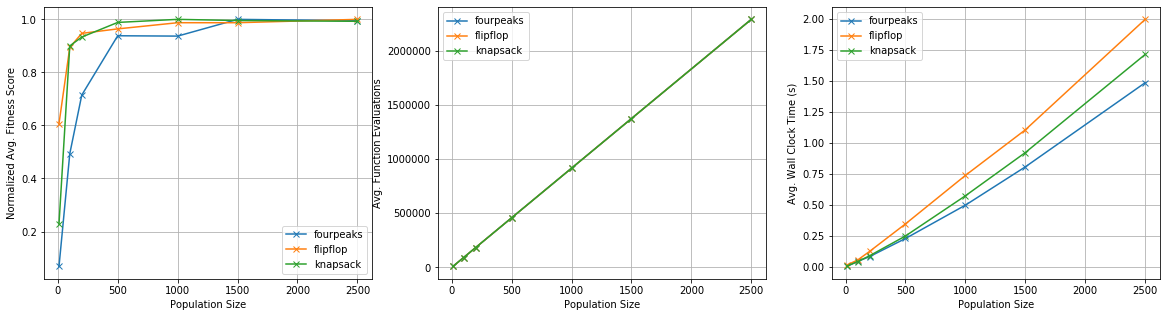

In [45]:
# GA Populations
populations = [10, 100, 200, 500, 1000, 1500, 2500]
# Plot the data
_, axes = plt.subplots(1, 3, figsize=(20, 5))
count = 0
for metric in sa_tuning:
    for problem in ga_tuning[metric]:
        y = ga_tuning[metric][problem]
        if metric == 'scores':
            y_norm = [float(i) / max(y) for i in y]
            axes[count].plot(populations, y_norm, 'x-', label=problem)
        else:
            axes[count].plot(populations, y, 'x-', label=problem)
    if count == 0:
        x_label = 'Normalized Avg. Fitness Score'
    elif count == 1:
        x_label = 'Avg. Function Evaluations'
    else:
        x_label = 'Avg. Wall Clock Time (s)'
    axes[count].set_xlabel('Population Size')
    axes[count].set_ylabel(x_label)
    axes[count].grid()
    axes[count].legend() 
    count += 1

# Show the plot
plt.show()

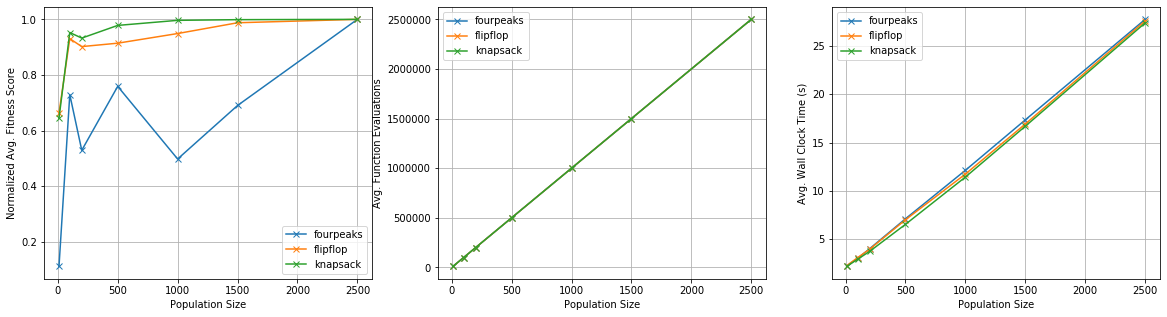

In [47]:
# MIMIC Populations
populations = [10, 100, 200, 500, 1000, 1500, 2500]
# Plot the data
_, axes = plt.subplots(1, 3, figsize=(20, 5))
count = 0
for metric in sa_tuning:
    for problem in mimic_tuning[metric]:
        y = mimic_tuning[metric][problem]
        if metric == 'scores':
            y_norm = [float(i) / max(y) for i in y]
            axes[count].plot(populations, y_norm, 'x-', label=problem)
        else:
            axes[count].plot(populations, y, 'x-', label=problem)
    if count == 0:
        x_label = 'Normalized Avg. Fitness Score'
    elif count == 1:
        x_label = 'Avg. Function Evaluations'
    else:
        x_label = 'Avg. Wall Clock Time (s)'
    axes[count].set_xlabel('Population Size')
    axes[count].set_ylabel(x_label)
    axes[count].grid()
    axes[count].legend() 
    count += 1

# Show the plot
plt.show()

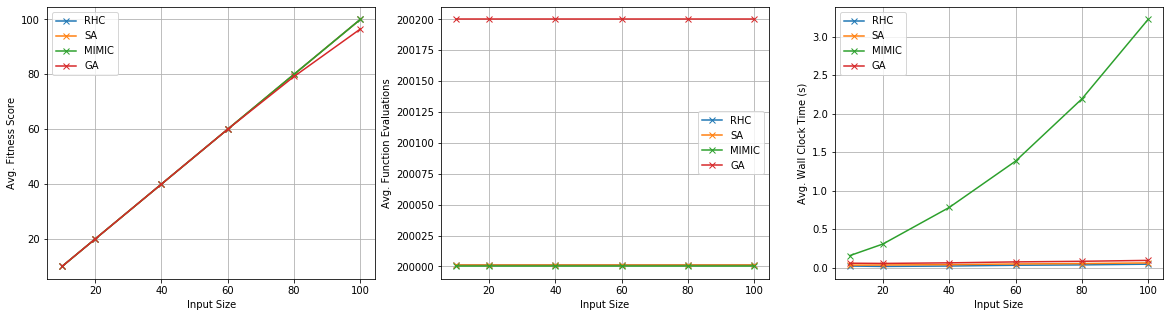

In [36]:
# Plot the data
_, axes = plt.subplots(1, 3, figsize=(20, 5))
count = 0
for metric in count_ones:
    for algo in count_ones[metric]:
        y = count_ones[metric][algo]
        axes[count].plot(input_sizes, y, 'x-',label=algo)
    if count == 0:
        x_label = 'Avg. Fitness Score'
    elif count == 1:
        x_label = 'Avg. Function Evaluations'
    else:
        x_label = 'Avg. Wall Clock Time (s)'
    axes[count].set_xlabel('Input Size')
    axes[count].set_ylabel(x_label)
    axes[count].grid()
    axes[count].legend() 
    count += 1

# Show the plot
plt.show()

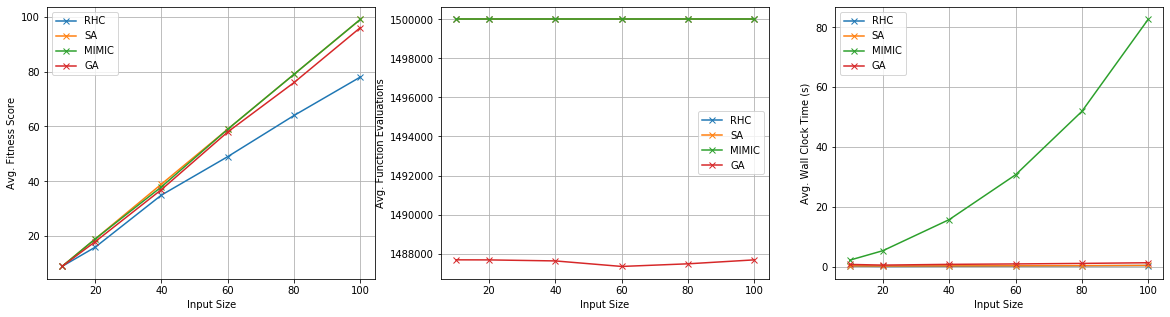

In [33]:
# Plot the data
_, axes = plt.subplots(1, 3, figsize=(20, 5))
count = 0
for metric in flipflop:
    for algo in flipflop[metric]:
        y = flipflop[metric][algo]
        axes[count].plot(input_sizes, y,'x-', label=algo)
    if count == 0:
        x_label = 'Avg. Fitness Score'
    elif count == 1:
        x_label = 'Avg. Function Evaluations'
    else:
        x_label = 'Avg. Wall Clock Time (s)'
    axes[count].set_xlabel('Input Size')
    axes[count].set_ylabel(x_label)
    axes[count].grid()
    axes[count].legend() 
    count += 1

# Show the plot
plt.show()

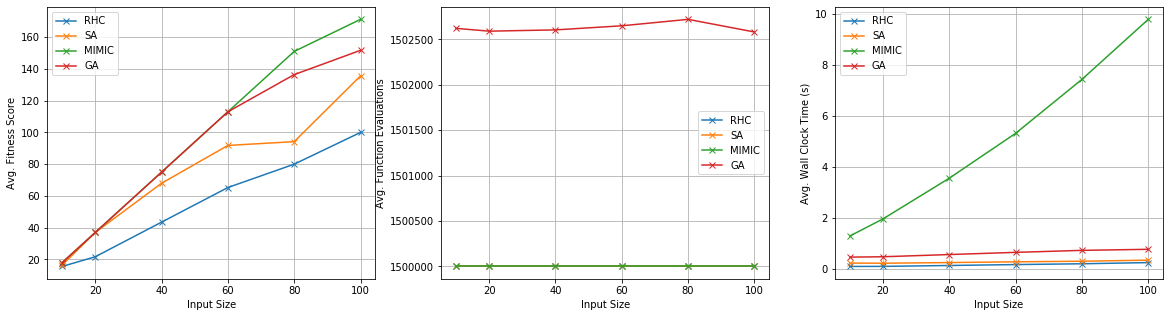

In [37]:
# Plot the data
_, axes = plt.subplots(1, 3, figsize=(20, 5))
count = 0
for metric in four_peaks:
    for algo in four_peaks[metric]:
        y = four_peaks[metric][algo]
        axes[count].plot(input_sizes, y, 'x-', label=algo)
    if count == 0:
        x_label = 'Avg. Fitness Score'
    elif count == 1:
        x_label = 'Avg. Function Evaluations'
    else:
        x_label = 'Avg. Wall Clock Time (s)'
    axes[count].set_xlabel('Input Size')
    axes[count].set_ylabel(x_label)
    axes[count].grid()
    axes[count].legend() 
    count += 1

# Show the plot
plt.show()

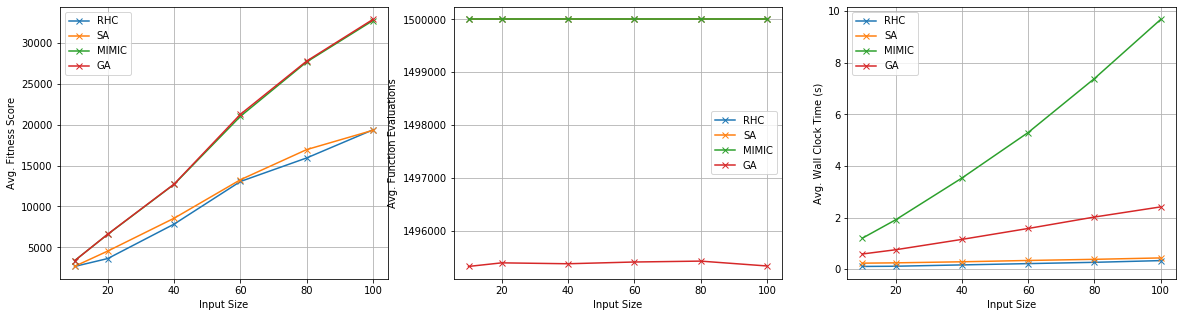

In [38]:
# Plot the data
_, axes = plt.subplots(1, 3, figsize=(20, 5))
count = 0
for metric in knapsack:
    for algo in knapsack[metric]:
        y = knapsack[metric][algo]
        axes[count].plot(input_sizes, y, 'x-', label=algo)
    if count == 0:
        x_label = 'Avg. Fitness Score'
    elif count == 1:
        x_label = 'Avg. Function Evaluations'
    else:
        x_label = 'Avg. Wall Clock Time (s)'
    axes[count].set_xlabel('Input Size')
    axes[count].set_ylabel(x_label)
    axes[count].grid()
    axes[count].legend() 
    count += 1

# Show the plot
plt.show()

## Neural Network Weight Optimization

In [2]:
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.metrics import log_loss, f1_score

import mlrose_hiive
from mlrose_hiive import GeomDecay, ArithDecay, ExpDecay
from mlrose_hiive.runners import NNGSRunner
from mlrose_hiive.neural.activation import relu
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import utils

In [3]:
df = pd.read_csv("datasets/UCI_Credit_Card.csv", header=0)
feature_cols = [col for col in df.columns if col != 'ID' and col != 'default.payment.next.month']
features = df[feature_cols]
target = df['default.payment.next.month']
col_names = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
scaled_cols = [x for x in list(features) if x not in col_names]

column_trans = make_column_transformer(
    (OneHotEncoder(), col_names),
    remainder=StandardScaler()
)

features_ohe = column_trans.fit_transform(features)

one_hot = OneHotEncoder()
target_hot = one_hot.fit_transform(target.values.reshape(-1, 1)).todense()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(features_ohe.todense(), target_hot, test_size=0.2, stratify=target, random_state=5)

In [5]:
nn_sgd_model = NeuralNetwork(hidden_nodes = [20], 
                             activation ='relu', 
                             algorithm ='gradient_descent', 
                             max_iters = 1000, 
                             bias = True, 
                             is_classifier = True, 
                             learning_rate = 0.0001, 
                             early_stopping = True, 
                             max_attempts = 100, 
                             curve=True,
                             random_state = 3)

[learning_curve] Training set sizes: [ 1600  5200  8800 12400 16000]


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of  15 | elapsed:   13.7s remaining:  1.5min
[Parallel(n_jobs=8)]: Done   4 out of  15 | elapsed:   30.8s remaining:  1.4min
[Parallel(n_jobs=8)]: Done   6 out of  15 | elapsed:   47.5s remaining:  1.2min
[Parallel(n_jobs=8)]: Done   8 out of  15 | elapsed:  1.0min remaining:   53.5s
[Parallel(n_jobs=8)]: Done  10 out of  15 | elapsed:  1.3min remaining:   38.2s
[Parallel(n_jobs=8)]: Done  12 out of  15 | elapsed:  1.4min remaining:   21.6s
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:  1.8min finished


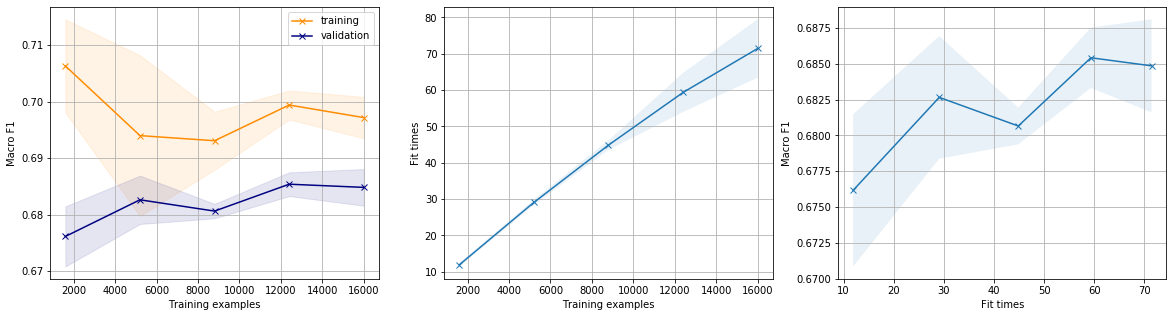

In [10]:
title = ''
sgd_train_sizes, sgd_train_times, _ = utils.plot_learning_curve(nn_sgd_model, title, x_train, y_train, cv=3, scoring='f1_macro', loss=False, n_jobs=8)
plt.show()

In [6]:
nn_sgd_model.fit(x_train, y_train)
nn_sgd_model.fitness_curve

array([ -1.27954498, -13.20350415,  -3.26251543,  -0.78358151,
        -0.74235526,  -0.72216291,  -0.70864905,  -0.69842748,
        -0.68975678,  -0.68172083,  -0.67409275,  -0.66681769,
        -0.65941312,  -0.65197319,  -0.64482571,  -0.63810267,
        -0.63156094,  -0.6247134 ,  -0.61736101,  -0.60836088,
        -0.59651736,  -0.57899867,  -0.55023262,  -0.52328008,
        -0.51178785,  -0.50286941,  -0.49597225,  -0.49066714,
        -0.48646652,  -0.48311584,  -0.48038061,  -0.47802474,
        -0.47595125,  -0.47410846,  -0.47243454,  -0.47091083,
        -0.46953172,  -0.46827737,  -0.46710971,  -0.4660144 ,
        -0.46497036,  -0.46399738,  -0.46309225,  -0.46228854,
        -0.46158644,  -0.46105507,  -0.46089369,  -0.46166225,
        -0.46574805,  -0.47556244,  -0.50813296,  -0.50933978,
        -0.51347982,  -0.48686048,  -0.46770206,  -0.46348129,
        -0.46047436,  -0.45885357,  -0.45763102,  -0.4567594 ,
        -0.45609135,  -0.45553104,  -0.45527026,  -0.45

In [7]:
nn_pred = nn_sgd_model.predict(x_test)
print(classification_report(y_test, nn_pred, digits=4))
print(log_loss(y_test, nn_pred, normalize=True))

              precision    recall  f1-score   support

           0     0.8362    0.9482    0.8887      4673
           1     0.6548    0.3459    0.4527      1327

   micro avg     0.8150    0.8150    0.8150      6000
   macro avg     0.7455    0.6471    0.6707      6000
weighted avg     0.7961    0.8150    0.7923      6000
 samples avg     0.8150    0.8150    0.8150      6000

6.389673633058477


## RHC

In [11]:
grid_search_parameters = ({
    'max_iters': [1000],
    'learning_rate': [0.1, 0.01, 0.001, 0.0001]                         # nn params
})

nn_rhc_gs = NNGSRunner(x_train=x_train,
                       y_train=y_train,
                       x_test=x_test,
                       y_test=y_test,
                       experiment_name='nn_rhc_test',
                       activation=[relu],
                       algorithm=mlrose_hiive.algorithms.rhc.random_hill_climb,
                       grid_search_scorer_method=f1_score,
                       grid_search_parameters=grid_search_parameters,
                       iteration_list=[10, 50, 100, 300, 400, 500, 600, 700, 800, 900, 1000],
                       hidden_layer_sizes=[[20]],
                       bias=True,
                       early_stopping=True,
                       clip_max=1e+10,
                       max_attempts=500,
                       generate_curves=True,
                       output_directory='.',
                       n_jobs=1,
                       cv=3,
                       seed=3)
rhc_res = nn_rhc_gs.run()

Running nngs_rhc
Fitting 3 folds for each of 4 candidates, totalling 12 fits
*****************
*** Run START ***
*****************
max_iters:[1000], learning_rate:[0.1], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[0], iteration:[0], done:[False], time:[0.03], fitness:[1.2724]
	[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728// -0.89466072]...



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iters:[1000], learning_rate:[0.1], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[2], iteration:[10], done:[False], time:[0.25], fitness:[1.2631]
	[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728// -0.89466072]...

max_iters:[1000], learning_rate:[0.1], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[4], iteration:[50], done:[False], time:[1.14], fitness:[1.2314]
	[ 0.10159581

max_iters:[1000], learning_rate:[0.1], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[2], iteration:[400], done:[False], time:[8.96], fitness:[1.0580]
	[ 0.10159581  0.41629565 -0.41819052 ... -0.19128262 -0.72023728// -0.89466072]...

max_iters:[1000], learning_rate:[0.1], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[3], iteration:[500], done:[False], time:[11.60], fitness:[0.9943]
	[ 0.10159

max_iters:[1000], learning_rate:[0.1], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[3], iteration:[800], done:[False], time:[19.92], fitness:[0.9375]
	[ 0.10159581  0.41629565 -0.41819052 ... -0.19128262 -0.72023728// -0.89466072]...

max_iters:[1000], learning_rate:[0.1], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[1], iteration:[900], done:[False], time:[22.69], fitness:[0.9155]
	[ 0.1015

max_iters:[1000], learning_rate:[0.01], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[2], iteration:[10], done:[False], time:[0.24], fitness:[1.2765]
	[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728// -0.89466072]...

max_iters:[1000], learning_rate:[0.01], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[4], iteration:[50], done:[False], time:[1.13], fitness:[1.2432]
	[ 0.101595

max_iters:[1000], learning_rate:[0.01], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[4], iteration:[400], done:[False], time:[9.33], fitness:[1.0522]
	[ 0.10159581  0.41629565 -0.41819052 ... -0.19128262 -0.72023728// -0.89466072]...

max_iters:[1000], learning_rate:[0.01], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[3], iteration:[500], done:[False], time:[12.10], fitness:[0.9873]
	[ 0.101

max_iters:[1000], learning_rate:[0.001], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[3], iteration:[800], done:[False], time:[20.35], fitness:[0.9347]
	[ 0.10159581  0.41629565 -0.41819052 ... -0.19128262 -0.72023728// -0.89466072]...

max_iters:[1000], learning_rate:[0.001], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[1], iteration:[900], done:[False], time:[23.24], fitness:[0.9127]
	[ 0.

max_iters:[1000], learning_rate:[0.001], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[2], iteration:[10], done:[False], time:[0.25], fitness:[1.2719]
	[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728// -0.89466072]...

max_iters:[1000], learning_rate:[0.001], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[6], iteration:[50], done:[False], time:[1.14], fitness:[1.2378]
	[ 0.1015

max_iters:[1000], learning_rate:[0.0001], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[2], iteration:[400], done:[False], time:[10.86], fitness:[1.0483]
	[ 0.10159581  0.41629565 -0.41819052 ... -0.19128262 -0.72023728// -0.89466072]...

max_iters:[1000], learning_rate:[0.0001], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[2], iteration:[500], done:[False], time:[14.06], fitness:[0.9842]
	[ 

max_iters:[1000], learning_rate:[0.0001], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[1], iteration:[700], done:[False], time:[20.59], fitness:[0.9630]
	[ 0.10159581  0.41629565 -0.41819052 ... -0.19128262 -0.72023728// -0.89466072]...

max_iters:[1000], learning_rate:[0.0001], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[3], iteration:[800], done:[False], time:[23.80], fitness:[0.9451]
	[ 

max_iters:[1000], learning_rate:[0.0001], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[6], iteration:[1000], done:[True], time:[26.34], fitness:[0.9104]
	[ 0.10159581  0.41629565 -0.41819052 ... -0.19128262 -0.72023728// -0.89466072]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
max_iters:[1000], learning_rate:[0.1], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  5.5min finished


max_iters:[1000], learning_rate:[0.1], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[2], iteration:[10], done:[False], time:[0.42], fitness:[1.2705]
	[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728// -0.89466072]...

max_iters:[1000], learning_rate:[0.1], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[rhc], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500], current_restart:[0]
runner_name:[nngs_rhc], experiment_name:[nn_rhc_test], attempt:[4], iteration:[50], done:[False], time:[1.92], fitness:[1.2375]
	[ 0.10159581

In [12]:
print (rhc_res[3].best_score_, rhc_res[3].best_params_)
print(rhc_res[1])

0.3265600032113641 {'activation': <function relu at 0x122bd0d90>, 'hidden_layer_sizes': [20], 'learning_rate': 0.1, 'max_iters': 1000}
     Iteration       Time   Fitness  max_iters  learning_rate  \
0            0   0.040195  1.279412       1000            0.1   
1            1   0.091161  1.279412       1000            0.1   
2            2   0.114215  1.279272       1000            0.1   
3            3   0.162109  1.279272       1000            0.1   
4            4   0.186437  1.279271       1000            0.1   
..         ...        ...       ...        ...            ...   
995        995  41.497353  0.910931       1000            0.1   
996        996  41.522175  0.910931       1000            0.1   
997        997  41.548365  0.910931       1000            0.1   
998        998  41.572886  0.910931       1000            0.1   
999        999  41.597469  0.910931       1000            0.1   

                                            init_state algorithm activation  \
0    

[learning_curve] Training set sizes: [ 1600  5200  8800 12400 16000]


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of  15 | elapsed:    5.4s remaining:   35.4s
[Parallel(n_jobs=8)]: Done   4 out of  15 | elapsed:   14.7s remaining:   40.4s
[Parallel(n_jobs=8)]: Done   6 out of  15 | elapsed:   23.2s remaining:   34.7s
[Parallel(n_jobs=8)]: Done   8 out of  15 | elapsed:   29.7s remaining:   26.0s
[Parallel(n_jobs=8)]: Done  10 out of  15 | elapsed:   37.7s remaining:   18.9s
[Parallel(n_jobs=8)]: Done  12 out of  15 | elapsed:   41.6s remaining:   10.4s
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:   53.6s finished


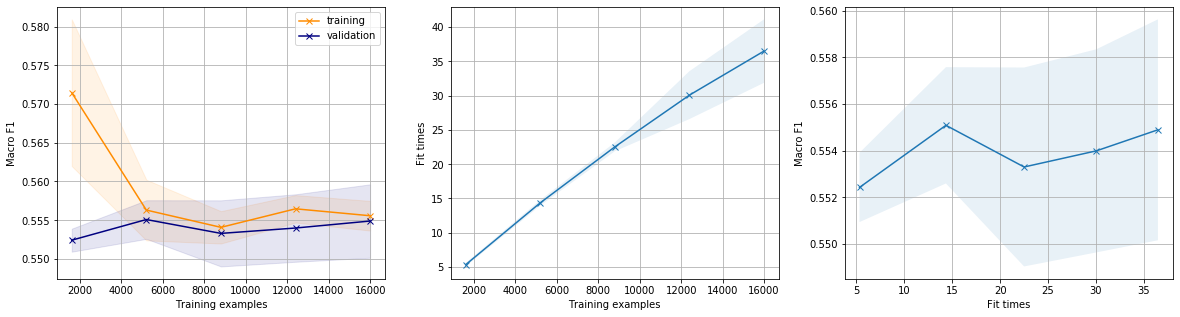

In [8]:
nn_rhc_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [20], 
                                          activation ='relu', 
                                          algorithm ='random_hill_climb', 
                                          max_iters = 1000, 
                                          learning_rate = 0.1,
                                          curve = True,
                                          max_attempts = 1000,
                                          restarts = 0,
                                          random_state = 3)
title = ''
rhc_train_size, rhc_fit_times, _ = utils.plot_learning_curve(nn_rhc_model, title, x_train, y_train, cv=3, scoring='f1_macro', loss=False, n_jobs=8)
plt.show()

In [21]:
nn_rhc = nn_rhc_model.fit(x_train, y_train)

In [22]:
print(nn_rhc_model.fitness_curve)

[1.27954498 1.27954496 1.27697049 1.27421779 1.27421692 1.27421692
 1.27400665 1.27400665 1.27399985 1.27399985 1.27399985 1.27399985
 1.27399376 1.27376605 1.27375765 1.27375765 1.27375765 1.27375765
 1.27375765 1.27375765 1.27375765 1.27375765 1.27375099 1.27371418
 1.27186475 1.26831885 1.26831885 1.26831885 1.26831885 1.26803995
 1.26803445 1.26803445 1.26777044 1.26777044 1.26777044 1.26777044
 1.26777044 1.26742022 1.26742022 1.26742022 1.26741707 1.26741707
 1.26741707 1.26630923 1.26630923 1.26630923 1.26606367 1.25978082
 1.25978082 1.25978082 1.25978082 1.2595695  1.2595695  1.2595695
 1.25935682 1.25935682 1.25934921 1.25934921 1.25934921 1.25916289
 1.25916289 1.25916289 1.25755819 1.25355083 1.25353286 1.25353286
 1.25352641 1.2509454  1.2509454  1.25029834 1.25029826 1.2496687
 1.2496687  1.24957315 1.24957286 1.24947007 1.24943665 1.24920859
 1.24920859 1.24913731 1.24910434 1.24910434 1.24910434 1.24910344
 1.24910344 1.2491031  1.24806236 1.24806236 1.24804079 1.240179

In [23]:
nn_rhc_pred = nn_rhc_model.predict(x_test)
print(classification_report(y_test, nn_rhc_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8016    0.8603    0.8299      4673
           1     0.3371    0.2502    0.2872      1327

   micro avg     0.7253    0.7253    0.7253      6000
   macro avg     0.5693    0.5552    0.5585      6000
weighted avg     0.6989    0.7253    0.7099      6000
 samples avg     0.7253    0.7253    0.7253      6000



## SA

In [14]:
decays = [0.1, 0.3, 0.5, 0.7, 0.9, 0.99]
param_range = [GeomDecay(decay=decay) for decay in decays]

grid_search_parameters = ({
    'max_iters': [1000],
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'schedule': param_range
})

nn_sa_gs = NNGSRunner(x_train=x_train,
                      y_train=y_train,
                      x_test=x_test,
                      y_test=y_test,
                      experiment_name='nn_sa_test',
                      activation=[relu],
                      algorithm=mlrose_hiive.algorithms.sa.simulated_annealing,
                      grid_search_scorer_method=f1_score,
                      grid_search_parameters=grid_search_parameters,
                      iteration_list=[10, 50, 100, 300, 400, 500, 600, 700, 800, 900, 1000],
                      hidden_layer_sizes=[[20]],
                      bias=True,
                      early_stopping=False,
                      clip_max=1e+10,
                      max_attempts=500,
                      generate_curves=True,
                      output_directory='.',
                      n_jobs=8,
                      cv=3,
                      seed=3)
sa_res = nn_sa_gs.run()

Running nngs_sa
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  6.0min
[Parallel(n_jobs=8)]: Done  72 out of  72 | elapsed: 10.8min finished


*****************
*** Run START ***
*****************
max_iters:[1000], learning_rate:[0.1], schedule:[1.0], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[sa], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500]
runner_name:[nngs_sa], experiment_name:[nn_sa_test], attempt:[0], iteration:[0], done:[False], time:[0.04], fitness:[1.2795]
	[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728// -0.89466072]...

max_iters:[1000], learning_rate:[0.1], schedule:[1.0], init_state:[[ 0.10159581  0.41629565 -0.41819052 ... -0.29128262 -0.72023728
 -0.89466072]], algorithm:[sa], activation:[relu], bias:[True], early_stopping:[True], clip_max:[10000000000.0], hidden_layer_sizes:[[20]], learning_rate_init:[0.1], max_attempts:[500]
runner_name:[nngs_sa], experiment_name:[nn_sa_test], attempt:[1], iteration:[10], done:[False], time:[

In [15]:
print (sa_res[3].best_score_, sa_res[3].best_params_)
print(sa_res[2])

0.29848840693490064 {'activation': <function relu at 0x12936ed90>, 'hidden_layer_sizes': [20], 'learning_rate': 0.1, 'max_iters': 1000, 'schedule': GeomDecay(init_temp=1.0, decay=0.1, min_temp=0.001)}
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       70.832808      0.670005         0.032794        0.005411   
1       72.119028      0.142324         0.036932        0.000129   
2       71.972685      0.214494         0.041366        0.003969   
3       72.085604      0.193508         0.035945        0.006018   
4       72.421463      0.151850         0.038122        0.000248   
5       70.941578      1.688197         0.035945        0.002220   
6       68.588676      0.151464         0.030855        0.002173   
7       68.781759      0.148759         0.037221        0.002198   
8       67.898708      0.264461         0.028915        0.007723   
9       67.641295      0.151806         0.024402        0.001964   
10      69.281914      2.600496         0.034220   

[learning_curve] Training set sizes: [ 1600  5200  8800 12400 16000]


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of  15 | elapsed:    7.2s remaining:   46.6s
[Parallel(n_jobs=8)]: Done   4 out of  15 | elapsed:   19.9s remaining:   54.8s
[Parallel(n_jobs=8)]: Done   6 out of  15 | elapsed:   32.6s remaining:   49.0s
[Parallel(n_jobs=8)]: Done   8 out of  15 | elapsed:   42.2s remaining:   36.9s
[Parallel(n_jobs=8)]: Done  10 out of  15 | elapsed:   53.3s remaining:   26.7s
[Parallel(n_jobs=8)]: Done  12 out of  15 | elapsed:   58.2s remaining:   14.5s
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:  1.2min finished


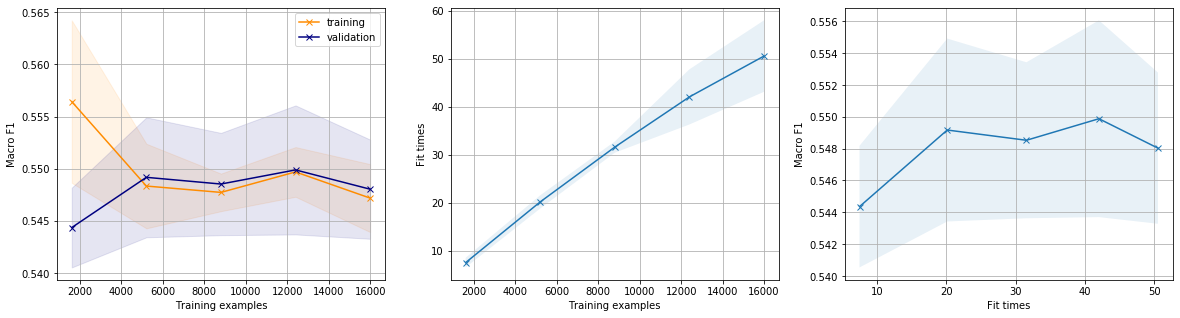

In [17]:
nn_sa_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [20], 
                                         activation ='relu', 
                                         algorithm ='simulated_annealing', 
                                         schedule=(GeomDecay(decay=0.1)),
                                         max_iters = 1000,
                                         learning_rate = 0.1, 
                                         max_attempts = 1000,
                                         curve = True,
                                         random_state = 3)
title = ''
sa_train_size, sa_fit_times, _ = utils.plot_learning_curve(nn_sa_model, title, x_train, y_train, cv=3, scoring='f1_macro', loss=False, n_jobs=8)
plt.show()

In [18]:
nn_sa_model.fit(x_train, y_train)

NeuralNetwork(activation='relu', algorithm='simulated_annealing', bias=True,
              clip_max=10000000000.0, curve=True, early_stopping=False,
              hidden_nodes=[20], is_classifier=True, learning_rate=0.1,
              max_attempts=1000, max_iters=1000, mutation_prob=0.1,
              pop_size=200, random_state=3, restarts=0,
              schedule=GeomDecay(init_temp=1.0, decay=0.1, min_temp=0.001))

In [20]:
nn_sa_pred = nn_sa_model.predict(x_test)
print(classification_report(y_test, nn_sa_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7996    0.8538    0.8258      4673
           1     0.3238    0.2464    0.2798      1327

   micro avg     0.7195    0.7195    0.7195      6000
   macro avg     0.5617    0.5501    0.5528      6000
weighted avg     0.6944    0.7195    0.7051      6000
 samples avg     0.7195    0.7195    0.7195      6000



## GA

In [11]:
pops = [10, 100, 500, 1000, 2000]
mutations = [0.1, 0.3, 0.5, 0.7, 0.9]

grid_search_parameters = ({
    'max_iters': [100],
    'learning_rate': [0.1],
    'pop': pops,
    'mutation_prob': mutations
})

nn_ga_gs = NNGSRunner(x_train=x_train,
                      y_train=y_train,
                      x_test=x_test,
                      y_test=y_test,
                      experiment_name='nn_ga_test',
                      activation=[relu],
                      algorithm=mlrose_hiive.algorithms.ga.genetic_alg,
                      grid_search_scorer_method=f1_score,
                      grid_search_parameters=grid_search_parameters,
                      iteration_list=[10, 50, 100],
                      hidden_layer_sizes=[[20]],
                      bias=True,
                      early_stopping=True,
                      clip_max=1e+10,
                      max_attempts=10,
                      generate_curves=True,
                      output_directory='.',
                      n_jobs=8,
                      cv=3,
                      seed=3)
ga_res = nn_ga_gs.run()

Running nngs_ga
Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 14.4min
[Parallel(n_jobs=8)]: Done  75 out of  75 | elapsed: 25.8min finished


Run time: 1549.4094129129999
Saving: [./nn_ga_test/nngs_ga__nn_ga_test__cv_results_df.csv]
Saving: [./nn_ga_test/nngs_ga__nn_ga_test__grid_search_results.p]
**********
Score: nan
**********
********************************
*** Spawn Count Remaining: 1 ***
********************************


In [12]:
print (ga_res[3].best_score_, ga_res[3].best_params_)
print(ga_res[2])

0.24460762647664594 {'activation': <function relu at 0x126460d90>, 'hidden_layer_sizes': [20], 'learning_rate': 0.1, 'max_iters': 100, 'mutation_prob': 0.1, 'pop': 10}
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      243.484984    112.322934         0.043675        0.002810   
1      244.066281    112.278511         0.043364        0.005403   
2      244.793064    113.351675         0.037977        0.000507   
3      242.348976    107.810599         0.036548        0.001568   
4      240.518448    112.424769         0.049558        0.005240   
5      131.876163     15.414609         0.036839        0.008446   
6      129.642475     15.459938         0.048274        0.012839   
7      132.148159     15.225415         0.054333        0.020329   
8      136.389362     15.715928         0.042715        0.003878   
9      140.305658     16.914563         0.043141        0.005706   
10     148.244271     42.220837         0.064275        0.015207   
11     154.87195

In [13]:
nn_ga_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [20], 
                                         activation ='relu', 
                                         algorithm ='genetic_alg', 
                                         max_iters = 1000, 
                                         learning_rate = 0.1,
                                         max_attempts = 10,
                                         pop_size = 500,
                                         mutation_prob = 0.1,
                                         curve = True,
                                         random_state = 3)

[learning_curve] Training set sizes: [ 1600  5200  8800 12400 16000]


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of  15 | elapsed:  1.9min remaining: 12.1min
[Parallel(n_jobs=8)]: Done   4 out of  15 | elapsed:  4.1min remaining: 11.2min
[Parallel(n_jobs=8)]: Done   6 out of  15 | elapsed:  6.7min remaining: 10.0min
[Parallel(n_jobs=8)]: Done   8 out of  15 | elapsed:  8.7min remaining:  7.6min
[Parallel(n_jobs=8)]: Done  10 out of  15 | elapsed: 10.9min remaining:  5.4min
[Parallel(n_jobs=8)]: Done  12 out of  15 | elapsed: 12.1min remaining:  3.0min
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed: 14.6min finished


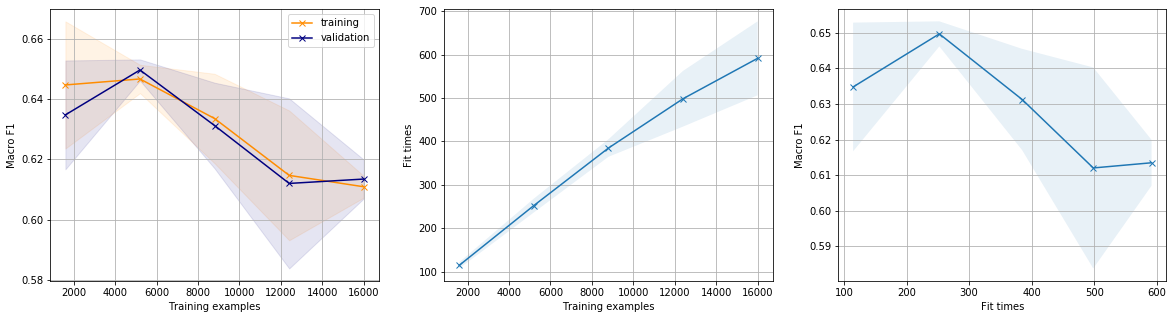

In [6]:
title = ''
ga_train_size, ga_fit_times, _ = utils.plot_learning_curve(nn_ga_model, title, x_train, y_train, cv=3, scoring='f1_macro', loss=False, n_jobs=8)
plt.show()

In [ ]:
nn_ga_model.fit(x_train, y_train)

In [ ]:
nn_ga_pred = nn_ga_model.predict(x_test)
print(classification_report(y_test, nn_ga_pred, digits=4))